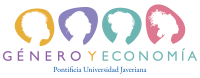

# **Sesión 2: Introducción a Pandas**

---

Autor: Andrés Felipe Díaz Rodríguez. Asistente de investigación Proyecto Género y Economía (https://generoyeconomia.org).

---


**Contenido de la sesión:**
*  ¿Qué es Pandas?
1. Explorar un DataFrame
2. Filtrar un DataFrame
3. Añadir filas y columnas
4. Manipulación de DataFrames
5. Agregaciones y estadísticas descriptivas
6. Ejercicio

Nota: El material relacionado con esta sesión se encuentra en la página del curso: https://generoyeconomia.github.io/python_economia_cuidado/index.html  , en la sección Módulo 2.

## **¿Qué es Pandas?**

Pandas es una librería de Python que proporciona estructuras de datos rápidas, flexibles y expresivas diseñadas para hacer que trabajar con datos "relacionales" o "etiquetados" sea fácil e intuitivo. Su objetivo es ser el bloque de construcción de alto nivel fundamental para realizar análisis de datos prácticos y del mundo real en Python.

## **¿Qué tipo de datos se pueden trabajar con Pandas?**

### Series
Datos en una dimensión. Tienen un nombre y una lista de valores.

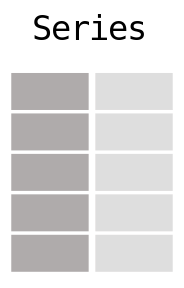

### DataFrames
Datos en dos dimensiones. Está organizado de manera tabular con filas y columnas, cada una con un nombre. En las celdas individuales puede ir un valor de cualquiera de los tipos de datos que maneja Python (enteros, decimales, texto, listas, otros data frames, etc...)

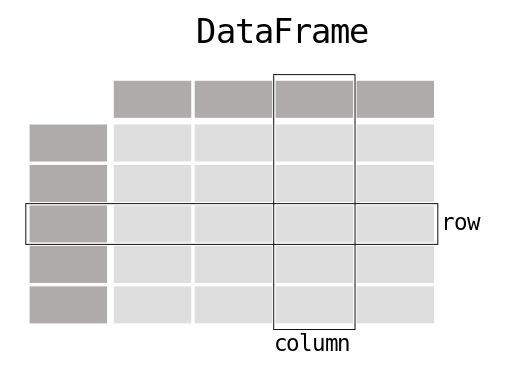

In [ ]:
# Instalación
!pip install pandas

In [ ]:
# Importar la librería
import pandas as pd

### **Crear un DataFrame**

In [ ]:
# ¿Cómo se define un dataframe?

data = [
    {"Nombre": "Emilio", "Edad": 25, "Ciudad": "Medellín"},
    {"Nombre": "Sofía", "Edad": 28, "Ciudad": "Tunja"},
    {"Nombre": "Sebastián", "Edad": 35, "Ciudad": "Bogotá"},
    {"Nombre": "Sara", "Edad": 22},
    {"Nombre": "Juana", "Edad": 43, "Ciudad": "Cali"}
]
data

[{'Nombre': 'Emilio', 'Edad': 25, 'Ciudad': 'Medellín'},
 {'Nombre': 'Sofía', 'Edad': 28, 'Ciudad': 'Tunja'},
 {'Nombre': 'Sebastián', 'Edad': 35, 'Ciudad': 'Bogotá'},
 {'Nombre': 'Sara', 'Edad': 22},
 {'Nombre': 'Juana', 'Edad': 43, 'Ciudad': 'Cali'}]

In [ ]:
df = pd.DataFrame(data)

## **Explorar un DataFrame**

In [ ]:
print(df)

      Nombre  Edad    Ciudad
0     Emilio    25  Medellín
1      Sofía    28     Tunja
2  Sebastián    35    Bogotá
3       Sara    22       NaN
4      Juana    43      Cali


In [ ]:
df

,Nombre,Edad,Ciudad
0,Emilio,25,Medellín
1,Sofía,28,Tunja
2,Sebastián,35,Bogotá
3,Sara,22,NaN
4,Juana,43,Cali


In [ ]:
print("Nombres de las columnas")
print(df.columns)
print("\nNombres de las filas (índice)")
print(df.index)

Nombres de las columnas
Index(['Nombre', 'Edad', 'Ciudad'], dtype='object')

Nombres de las filas (índice)
RangeIndex(start=0, stop=5, step=1)


In [ ]:
df.index = ["A","B","C","D","E"]
df

,Nombre,Edad,Ciudad
A,Emilio,25,Medellín
B,Sofía,28,Tunja
C,Sebastián,35,Bogotá
D,Sara,22,NaN
E,Juana,43,Cali


In [ ]:
print(df.index)

Index(['A', 'B', 'C', 'D', 'E'], dtype='object')


In [ ]:
# .shape permite ver cuántas filas y columnas tiene un DataFrame
df.shape

(5, 3)

### **`.loc` y `.iloc`**
* El método `pd.DataFrame().loc` permite acceder a filas y columnas especifícas de un DataFrame a partir de sus nombres.
* El método `pd.DataFrame().iloc` permite filtrar un DataFrame según sus posiciones, es decir, según el orden de cada columna y fila dentro del total.

In [ ]:
# Se puede llamar solamente una fila a partir de su índice
df.loc["D"]

Nombre    Sara
Edad        22
Ciudad     NaN
Name: D, dtype: object

In [ ]:
# Para llamar toda una fila hay que llamar todas las filas con ":" y el nombre de la columna
df.loc[:,"Edad"]

A    25
B    28
C    35
D    22
E    43
Name: Edad, dtype: int64

En los siguientes ejemplos el resultado del filtro es el mismo.
* Utilizando `loc` se llaman las filas según los índices, `["E","C"]`, y las columnas según sus nombres `["Nombre","Ciudad"]`.
* Con `iloc` se llaman las filas y columnas según el orden en el que están dentro de la tabla. Las filas `E` y `C` son las 4 y 2, respectivamente y las columnas `Nombre` y `Ciudad` son las 0 y 2, respectivamente.

In [ ]:
df.loc[["E","C"],["Nombre","Ciudad"]]

,Nombre,Ciudad
E,Juana,Cali
C,Sebastián,Bogotá


In [ ]:
df.iloc[[4,2],[0,2]]

,Nombre,Ciudad
E,Juana,Cali
C,Sebastián,Bogotá


In [ ]:
# Especificando una fila y una columna se puede acceder a un ítem específico
df.loc["D","Ciudad"]

nan

In [ ]:
# Igualmente, con las posiciones de las celdas se puede acceder a un ítem
df.iloc[2,1]

35

## **Filtrar un DataFrame**

### **Operadores lógicos**
Para filtrar un DataFrame es necesario utilizar los operadores lógicos de Ptyhon.

* Comparaciones entre números enteros o decimales `>` (mayor que), `<` (menor que), `>=` (mayor o oigual que), `<=` (menor o igual que), `==` (igual que), `!=` (distinto que)
* Para comparar otros tipos de datos se utiliza principalmente `==` y `!=`.

**Importante:** Utilizar un signo de igualdad se utiliza para asignación de variables y no para comparaciones.

In [ ]:
2 == (1+1)

True

In [ ]:
2 = (1+1)

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (<ipython-input-19-4b0538925a0a>, line 1)

In [ ]:
"A" < "B"

True

In [ ]:
df["Edad"] > 25

A    False
B     True
C     True
D    False
E     True
Name: Edad, dtype: bool

In [ ]:
df.loc[df["Edad"]>25]

,Nombre,Edad,Ciudad
B,Sofía,28,Tunja
C,Sebastián,35,Bogotá
E,Juana,43,Cali


In [ ]:
df.loc[~(df["Edad"]>25)]

,Nombre,Edad,Ciudad
A,Emilio,25,Medellín
D,Sara,22,NaN


In [ ]:
df.loc[df["Ciudad"]=="Cali"]

,Nombre,Edad,Ciudad
E,Juana,43,Cali


### **Vacíos**
Un tipo de dato clave en el manejo de datos es el vacío. En Pandas una celda que no contiene ninguna información se ve como `NaN`. Para analizar y trabajar con un DataFrame es clave tener claro si hay valores vacíos en la base de datos ya que hay operaciones que arrojarán errores cuando se intentan aplicar a valores vacíos.

Los métodos `.isnull()` y `.notnull()` permiten detectar cuáles son los valores que están vacíos dentro de un DataFrame.

In [ ]:
df.loc[df["Ciudad"].isnull()]

,Nombre,Edad,Ciudad
D,Sara,22,NaN


## **Añadir filas y columnas**

In [ ]:
df["Color"] = ["Rojo","Azul","Verde","Café","Rojo"]
df

,Nombre,Edad,Ciudad,Color
A,Emilio,25,Medellín,Rojo
B,Sofía,28,Tunja,Azul
C,Sebastián,35,Bogotá,Verde
D,Sara,22,NaN,Café
E,Juana,43,Cali,Rojo


In [ ]:
df.loc["F"] = {"Nombre" : "David", "Ciudad" : "Barranquilla", "Color":"Verde"}
df

,Nombre,Edad,Ciudad,Color
A,Emilio,25.0,Medellín,Rojo
B,Sofía,28.0,Tunja,Azul
C,Sebastián,35.0,Bogotá,Verde
D,Sara,22.0,NaN,Café
E,Juana,43.0,Cali,Rojo
F,David,NaN,Barranquilla,Verde


In [ ]:
df.loc["F","Edad"] = 27
df

,Nombre,Edad,Ciudad,Color
A,Emilio,25.0,Medellín,Rojo
B,Sofía,28.0,Tunja,Azul
C,Sebastián,35.0,Bogotá,Verde
D,Sara,22.0,NaN,Café
E,Juana,43.0,Cali,Rojo
F,David,27.0,Barranquilla,Verde


In [ ]:
lista_columnas = ["Nombre","Color"]
df[lista_columnas]

,Nombre,Color
A,Emilio,Rojo
B,Sofía,Azul
C,Sebastián,Verde
D,Sara,Café
E,Juana,Rojo
F,David,Verde


In [ ]:
lista_filas = ["B","E","D"]
df.loc[lista_filas]

,Nombre,Edad,Ciudad,Color
B,Sofía,28.0,Tunja,Azul
E,Juana,43.0,Cali,Rojo
D,Sara,22.0,NaN,Café


In [ ]:
lista_filas = ["B","E","D"]
df.loc[lista_filas,lista_columnas]

,Nombre,Color
B,Sofía,Azul
E,Juana,Rojo
D,Sara,Café


**Importante:** Hasta ahora hemos trabajado con un DataFrame llamado `df` y esta suele ser la convención cuando se ve documentación y ejemplos en línea. Sin embargo, no es obligatorio y el DataFrame se puede llamar de cualquier manera según sea más conveniente

**Ejercicio:** Escriban una línea de código donde añadan una fila al DataFrame que estamos trabajando. Definan el nombre, edad, ciudad y color para agregar y compártanlo en el chat para alimentar nuestra tabla.

In [ ]:
# Solución

## **Escribir y leer archivos**

Pandas permite exportar a muchos formatos usados ampliamente para análisis y manejo de datos. En ciencias sociales se utilizan principalmente formatos como csv, excel, stata y spss.

Estos son algunos de los ejemplos de las funciones utilizadas para escribir y leer un DataFrame en estos formatos son:

* `.to_csv()`, `.read_csv()`
* `.to_excel()`, `.read_excel()`
* `.to_stata()`, `.read_stata()`
* `.to_sas()`, `.read_sas()`
* `.to_spss()`, `.read_spss()`
* `.to_sql_table()`, `.read_sql_table()`
* `.to_sql_query()`, `.read_sql_query()`
* `.to_pickle()`, `.read_pickle()`
* `.to_table()`, `.read_table()`
* `.to_json()`, `.read_json()`
* `.to_html()`, `.read_html()`
* `.to_xml()`, `.read_xml()`
* `.to_parquet()`, `.read_parquet()`


In [ ]:
# Guardar el archivo
df.to_excel("df_prueba1.xlsx")

In [ ]:
# la función del borra una variable de la memoria
del df

In [ ]:
# Dado que fue borrada, la variable df ya no existe
df

NameError: name 'df' is not defined

In [ ]:
# Leer el archivo
df = pd.read_excel("df_prueba1.xlsx")
df

,Unnamed: 0,Nombre,Edad,Ciudad,Color
0,A,Emilio,25,Medellín,Rojo
1,B,Sofía,28,Tunja,Azul
2,C,Sebastián,35,Bogotá,Verde
3,D,Sara,22,NaN,Café
4,E,Juana,43,Cali,Rojo
5,F,David,27,Barranquilla,Verde


In [ ]:
# Leer el archivo
df = pd.read_excel("df_prueba1.xlsx",index_col="Nombre")
df

,Unnamed: 0,Edad,Ciudad,Color
Nombre,,,,
Emilio,A,25,Medellín,Rojo
Sofía,B,28,Tunja,Azul
Sebastián,C,35,Bogotá,Verde
Sara,D,22,NaN,Café
Juana,E,43,Cali,Rojo
David,F,27,Barranquilla,Verde


In [ ]:
# Leer el archivo
df = pd.read_excel("df_prueba1.xlsx",index_col=0)
df

,Nombre,Edad,Ciudad,Color
A,Emilio,25,Medellín,Rojo
B,Sofía,28,Tunja,Azul
C,Sebastián,35,Bogotá,Verde
D,Sara,22,NaN,Café
E,Juana,43,Cali,Rojo
F,David,27,Barranquilla,Verde


## **Manipulación de DataFrames**

Para realizar transformaciones en los datos, podemos utilizar **funciones** precargadas o definidas por nosotros mismos o **métodos** que ya están definidos por Pandas.


### **Funciones**
Una **función** es un bloque de código que solo corre cuando se llama. Una función generalmente recibe parámetros y devuelve resultados como otro objeto. La siguiente es una función que recibe dos parámetros (`a` y `b`), los suma y devuelve el resultado (`c`):

In [ ]:
def función(a,b) :
    c = a + b
    return c
c = función(1,2)
print("Suma de números")
print(c)

Suma de números
3


In [ ]:
print("Concatenación de strings")
c = función("ABC","DEF")
print(c)

Concatenación de strings
ABCDEF


**Importante:** Un **objeto** es un bloque de construcción fundamental de un lenguaje orientado a objetos. Los números enteros, las cadenas, los números en coma flotante, incluso las matrices y los diccionarios, son todos objetos. Más concretamente, cualquier número entero o cualquier texto es un objeto. El número 12 es un objeto, la cadena «Hello, World» es un objeto, una lista es un objeto que puede contener otros objetos, y así sucesivamente.

### **Métodos**
Un **método** es una función que "pertenece" a un objeto. La manera de acceder a un método es con un `.` luego del nombre del objeto. En colab se pueden presionar las teclas `Shift + Tab` luego del nombre de un objeto y un punto para acceder a la lista de métodos que ya están definidos.

In [ ]:
s = "String de prueba"
print(s)

String de prueba


In [ ]:
s.upper()

'STRING DE PRUEBA'

In [ ]:
s.lower()

'string de prueba'

In [ ]:
s.title()

'String De Prueba'

Los objetos de Pandas tienen una gran variedad de métodos a los que se puede acceder para hacer todo tipo de operaciones sobre los datos.

In [ ]:
df.reset_index()

,index,Nombre,Edad,Ciudad,Color
0,A,Emilio,25,Medellín,Rojo
1,B,Sofía,28,Tunja,Azul
2,C,Sebastián,35,Bogotá,Verde
3,D,Sara,22,NaN,Café
4,E,Juana,43,Cali,Rojo
5,F,David,27,Barranquilla,Verde


In [ ]:
df.rename(index={"A":0,"C":2})

,Nombre,Edad,Ciudad,Color
0,Emilio,25,Medellín,Rojo
B,Sofía,28,Tunja,Azul
2,Sebastián,35,Bogotá,Verde
D,Sara,22,NaN,Café
E,Juana,43,Cali,Rojo
F,David,27,Barranquilla,Verde


In [ ]:
df.rename(columns={"Ciudad":"Ciudad de residencia"})

,Nombre,Edad,Ciudad de residencia,Color
A,Emilio,25,Medellín,Rojo
B,Sofía,28,Tunja,Azul
C,Sebastián,35,Bogotá,Verde
D,Sara,22,NaN,Café
E,Juana,43,Cali,Rojo
F,David,27,Barranquilla,Verde


In [ ]:
df["Color"].replace({"Rojo":"Negro"})

A    Negro
B     Azul
C    Verde
D     Café
E    Negro
F    Verde
Name: Color, dtype: object

**Importante:** usar Google es lo más importante cuando estamos escribiendo código y queremos saber si ya hay una funcionalidad definida para lo que queremos hacer. Casi todo lo que queramos programar ya se ha hecho y alguien más ha tenido las mismas dudas y problemas que nosotros.
* A veces resulta mejor buscar en inglés ya que la comunidad de programadores lo utiliza más que el español.
* El sitio [StackOverflow](https://stackoverflow.com/) es de los insumos principales para encontrar respuestas.

* Cuando tengamos una mayor familiaridad con la sintaxis de Python, podemos ir directamente a la documentación oficial de los paquetes.

**Ejercicio**: Busquen en Google cuál es el método utilizado para organizar un dataframe según los valores de una columna y organicen `df` de *mayor a menor* según la columna de edad.


In [73]:
# Solución

Pandas también permite hacer operaciones matemáticas a todos los valores de una columna a la vez

In [ ]:
df["Edad"]**2

A     625
B     784
C    1225
D     484
E    1849
F     729
Name: Edad, dtype: int64

In [ ]:
df["Edad"] / 10

A    2.5
B    2.8
C    3.5
D    2.2
E    4.3
F    2.7
Name: Edad, dtype: float64

In [ ]:
df["Año de nacimiento"] = 2024 - df["Edad"]
df

,Nombre,Edad,Ciudad,Color,Año de nacimiento
A,Emilio,25,Medellín,Rojo,1999
B,Sofía,28,Tunja,Azul,1996
C,Sebastián,35,Bogotá,Verde,1989
D,Sara,22,NaN,Café,2002
E,Juana,43,Cali,Rojo,1981
F,David,27,Barranquilla,Verde,1997


Estraigamos la primera letra de cada nombre en el DataFrame y creemos una nueva columna. Primero, recordemos cómo se haría para una sola cadena de texto:

In [ ]:
"Emilio"[:1]

'E'

In [ ]:
# Se puede aplicar la misma operación sobre todos los elementos de la columna
df["Inicial"] = df["Nombre"].str[:1]
df

,Nombre,Edad,Ciudad,Color,Año de nacimiento,Inicial
A,Emilio,25,Medellín,Rojo,1999,E
B,Sofía,28,Tunja,Azul,1996,S
C,Sebastián,35,Bogotá,Verde,1989,S
D,Sara,22,NaN,Café,2002,S
E,Juana,43,Cali,Rojo,1981,J
F,David,27,Barranquilla,Verde,1997,D


### **Funciones Lambda**
Una función Lambda es una pequeña función anónima. Este tipo de funciones se utilizan cuando se quieren hacer operaciones pequeñas muchas veces.

```python
lambda argumentos : expresión
```

Por ejemplo, la siguiente función devuelve el último caracter de `nombre`.
```python
lambda nombre: nombre[-1]
```
Pandas permite aplicar estas funciones a todos los elementos de una fila:

In [ ]:
df["Final"] = df["Nombre"].apply(lambda nombre: nombre[-1])
df

,Nombre,Edad,Ciudad,Color,Año de nacimiento,Inicial,Final
A,Emilio,25,Medellín,Rojo,1999,E,o
B,Sofía,28,Tunja,Azul,1996,S,a
C,Sebastián,35,Bogotá,Verde,1989,S,n
D,Sara,22,NaN,Café,2002,S,a
E,Juana,43,Cali,Rojo,1981,J,a
F,David,27,Barranquilla,Verde,1997,D,d


Creemos una función que, para cada persona de la tabla, devuelva una lista con todas las demás personas que comparten su mismo color y utilicemos una función lambda para aplicarlo a todas las personas del DataFrame.

Primero, veamos cómo sería el proceso para una persona individualmente.

1. Definimos un color arbitrario como ejemplo
2. Podemos usar una comparación lógica para extraer las demás personas que tienen el mismo color

In [ ]:
color = "Verde"
df.loc[df["Color"]==color]

,Nombre,Edad,Ciudad,Color,Año de nacimiento,Inicial,Final
C,Sebastián,35,Bogotá,Verde,1989,S,n
F,David,27,Barranquilla,Verde,1997,D,d


3. Sacamos los nombres de cada una de las personas que filtramos

In [ ]:
df.loc[df["Color"]==color,"Nombre"]

C    Sebastián
F        David
Name: Nombre, dtype: object

4. Pasamos los valores de la columna a un formato de lista con el método `.to_list()`

In [ ]:
df.loc[df["Color"]==color,"Nombre"].to_list()

['Sebastián', 'David']

Ahora podemos empaquetar todo esto en una función

In [ ]:
def encontrar_compañeros(df,color) :
    resultado = df.loc[df["Color"]==color,"Nombre"].tolist()
    return resultado

Y, finalmente, aplicar la función lambda que toma dos parámetros al DataFrame.

In [ ]:
df["Compañeros"] = df["Color"].apply(lambda c: encontrar_compañeros(df,c))
df

,Nombre,Edad,Ciudad,Color,Año de nacimiento,Inicial,Final,Compañeros
A,Emilio,25,Medellín,Rojo,1999,E,o,"[Emilio, Juana]"
B,Sofía,28,Tunja,Azul,1996,S,a,[Sofía]
C,Sebastián,35,Bogotá,Verde,1989,S,n,"[Sebastián, David]"
D,Sara,22,NaN,Café,2002,S,a,[Sara]
E,Juana,43,Cali,Rojo,1981,J,a,"[Emilio, Juana]"
F,David,27,Barranquilla,Verde,1997,D,d,"[Sebastián, David]"


## **Agregaciones y estadísticas descriptivas**

Hay muchos métodos que permiten resumir los datos que hay dentro del DataFrame. Por ejemplo, se pueden hacer conteos, calcular promedios, sumas, mínimos y máximos así como todo tipo de estadísticas.

In [ ]:
?pd.DataFrame.value_counts

In [ ]:
df["Edad"].mean()

30.0

In [ ]:
df["Edad"].sum()

180

In [ ]:
df["Edad"].describe()

count     6.000000
mean     30.000000
std       7.694154
min      22.000000
25%      25.500000
50%      27.500000
75%      33.250000
max      43.000000
Name: Edad, dtype: float64

In [ ]:
df["Ciudad"].value_counts()

Ciudad
Medellín        1
Tunja           1
Bogotá          1
Cali            1
Barranquilla    1
Name: count, dtype: int64

In [ ]:
df["Color"].value_counts()

Color
Rojo     2
Verde    2
Azul     1
Café     1
Name: count, dtype: int64

### **.gropuby()**

El método `.groupby()` permite calcular operaciones y aplicar funciones agrupadas por categorías seún el valor de una columna.

Por ejemplo, si quisieramos calcular el promedio, mínimo y máximo de edad por cada uno de los colores de la base de datos, haríamos lo siguiente

In [ ]:
df.groupby("Color")

In [ ]:
df.groupby("Color")["Edad"].agg(["min","mean","max"])

,min,mean,max
Color,,,
Azul,28,28.0,28
Café,22,22.0,22
Rojo,25,34.0,43
Verde,27,31.0,35


## **Ejercicio**
El siguiente DataFrame contiene la información de varias familias y sus integrantes. Las columnas que forman la tabla son:

* Familia: Indica a qué familia pertenece cada persona. Por ejemplo, las tres primeras filas pertenecen a 'Familia1'.
* Persona: Asigna un número a cada persona dentro de su familia. Por ejemplo, en 'Familia1', hay tres personas identificadas con los números 1, 2 y 3.
* Género: Muestra el género de cada persona ('M' para masculino, 'F' para femenino).
* Edad: Indica la edad de cada persona en años.
* Horas_Trabajo_Hogar: Muestra cuántas horas dedica cada persona al trabajo en el hogar semanalmente.

Con base en estos datos respondan los siguientes items utilizando los métodos de Pandas:
1. ¿Cuántas familias hay en el DataFrame y cuántos integrantes tiene cada una?
2. Recodifiquen la columna de género para que pase de "F" a "Mujer" y de "M" a "Hombre".
3. ¿Cuál es la promedio de edad y de horas de trabajo en el hogar entre los hombres y las mujeres?
4. ¿Cuál es el promedio de horas de trabajo en el hogar que dedican las peronas mayores de edad (>= 18 años)? ¿y las menores?
5. Exporten el DataFrame a un archivo `.csv`.

In [ ]:
# Datos
horas_hogar = {
    'Familia': ['Familia1', 'Familia1', 'Familia1', 'Familia2', 'Familia2',
                'Familia3', 'Familia3', 'Familia3', 'Familia3', 'Familia4',
                'Familia4', 'Familia4', 'Familia5', 'Familia5', 'Familia5'],
    'Persona': [1, 2, 3, 1, 2, 1, 2, 3, 4, 1, 2, 3, 1, 2, 3],
    'Género': ['M', 'F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'Edad': [40, 38, 12, 45, 42, 50, 48, 15, 13, 35, 34, 10, 60, 58, 18],
    'Horas_Trabajo_Hogar': [5, 15, 2, 6, 14, 4, 18, 1, 3, 8, 12, 5, 2, 15, 1]
}

# Crear el DataFrame
horas_hogar_df = pd.DataFrame(horas_hogar)

# Mostrar el DataFrame
horas_hogar_df

,Familia,Persona,Género,Edad,Horas_Trabajo_Hogar
0,Familia1,1,M,40,5
1,Familia1,2,F,38,15
2,Familia1,3,M,12,2
3,Familia2,1,M,45,6
4,Familia2,2,F,42,14
5,Familia3,1,M,50,4
6,Familia3,2,F,48,18
7,Familia3,3,M,15,1
8,Familia3,4,F,13,3
9,Familia4,1,M,35,8
